# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [2]:
# Importando as bases
import pandas as pd
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')

In [3]:
# Verificando o formato da base
treino.shape

(1460, 81)

In [4]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

- Precisamos garantir que não vamos ter colunas de texto.

In [6]:
# Selecionando apenas as colunas numéricas
cols_num = treino.select_dtypes('number')
cols_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
# E criar uma nova base com esses valores
treino = cols_num
treino.shape

(1460, 38)

In [8]:
# Mantendo também apenas as colunas numéricas para a base de teste (que não possui SalePrice)
cols_num_test = teste.select_dtypes('number')
teste = cols_num_test
teste.shape

(1459, 37)

## Criando nosso modelo

- **Vamos separar em treino e validação.**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
# Selecionando X e y
X = treino.drop('SalePrice', axis=1)
y = treino.SalePrice

In [12]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [13]:
# Separando essa base em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [15]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [16]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [17]:
# Fazendo a previsão pros dados de validação
y_pred_rl = reg_rl.predict(X_val)

In [18]:
# Importando a árvore de regressão
from sklearn import tree

In [19]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [20]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_val)

In [21]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [22]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [23]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_val)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [25]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [26]:
# E o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [27]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_val, y_pred_rl))
print(mean_squared_error(y_val, y_pred_rl))

23903.714169898787
1545601028.656824


In [28]:
# da árvore de decisão
print(mean_absolute_error(y_val, y_pred_ad))
print(mean_squared_error(y_val, y_pred_ad))

27558.639004149376
2549442647.6556015


In [29]:
# e do knn
print(mean_absolute_error(y_val, y_pred_knn))
print(mean_squared_error(y_val, y_pred_knn))

33247.14937759336
2732965076.467842


- **Podemos plotar visualmente a relação do y_val com as previsões feitas:**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [31]:
# Importando o matplotlib
import matplotlib.pyplot as plt

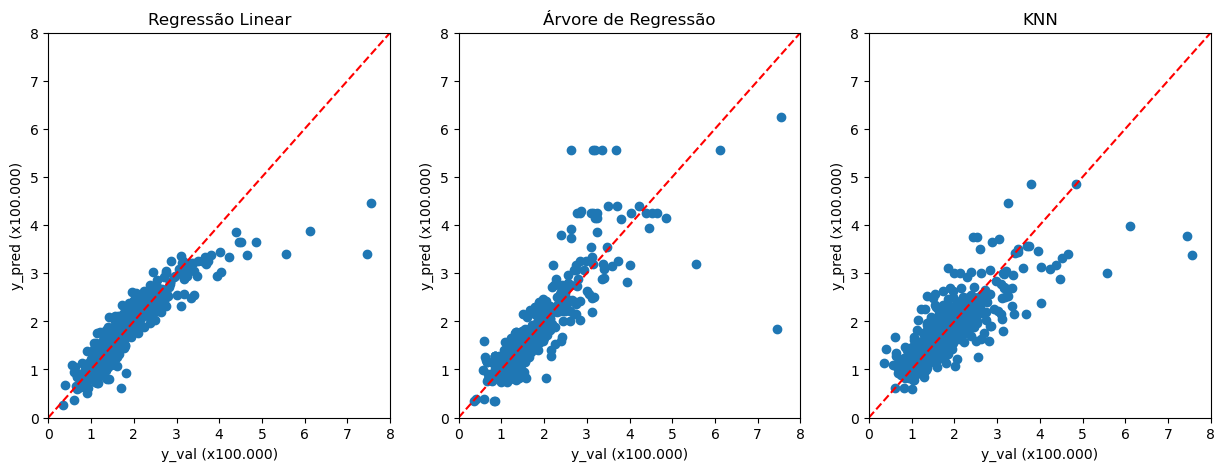

In [32]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_val/100000, y_pred_rl/100000)
ax[0].plot([0,8], [0,8], '--r')
ax[1].scatter(y_val/100000, y_pred_ad/100000)
ax[1].plot([0,8], [0,8], '--r')
ax[2].scatter(y_val/100000, y_pred_knn/100000)
ax[2].plot([0,8], [0,8], '--r')

ax[0].set(xlim=(0, 8), ylim=(0, 8))
ax[0].set_xlabel('y_val (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8), ylim=(0, 8))
ax[1].set_xlabel('y_val (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')
ax[2].set(xlim=(0, 8), ylim=(0, 8))
ax[2].set_xlabel('y_val (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos.**

## Fazendo a previsão para a base de teste da competição.

In [35]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [36]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [37]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [38]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,121143.646547
1,1462,133422.560426
2,1463,169157.583863


In [39]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado2.csv', index=False)